<a href="https://colab.research.google.com/github/smaranjitghose/floodater/blob/master/Floodator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 ## Importing the dependencies


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing
from sklearn import model_selection,neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix

## Fetching our data

In [0]:
data = pd.read_csv('https://raw.githubusercontent.com/smaranjitghose/floodater/master/kerala_rainfall.csv')

In [0]:
print(data)

    SUBDIVISION  YEAR   JAN   FEB  ...    NOV    DEC   ANNUAL RAINFALL  FLOODS
0        KERALA  1901  28.7  44.7  ...  350.8   48.4            3248.6     YES
1        KERALA  1902   6.7   2.6  ...  158.3  121.5            3326.6     YES
2        KERALA  1903   3.2  18.6  ...  157.0   59.0            3271.2     YES
3        KERALA  1904  23.7   3.0  ...   33.9    3.3            3129.7     YES
4        KERALA  1905   1.2  22.3  ...   74.4    0.2            2741.6      NO
..          ...   ...   ...   ...  ...    ...    ...               ...     ...
113      KERALA  2014   4.6  10.3  ...   99.5   47.2            3046.4     YES
114      KERALA  2015   3.1   5.8  ...  223.6   79.4            2600.6      NO
115      KERALA  2016   2.4   3.8  ...  125.4   23.6            2176.6      NO
116     KERALA   2017   1.9   6.8  ...   92.5   38.1            2117.1      NO
117      KERALA  2018  29.1  52.1  ...  125.4   65.1            4473.0     YES

[118 rows x 16 columns]


## Some minor tweaking

In [0]:
data['FLOODS'].replace(['YES','NO'],[1,0],inplace=True)

In [0]:
print(data)

    SUBDIVISION  YEAR   JAN   FEB  ...    NOV    DEC   ANNUAL RAINFALL  FLOODS
0        KERALA  1901  28.7  44.7  ...  350.8   48.4            3248.6       1
1        KERALA  1902   6.7   2.6  ...  158.3  121.5            3326.6       1
2        KERALA  1903   3.2  18.6  ...  157.0   59.0            3271.2       1
3        KERALA  1904  23.7   3.0  ...   33.9    3.3            3129.7       1
4        KERALA  1905   1.2  22.3  ...   74.4    0.2            2741.6       0
..          ...   ...   ...   ...  ...    ...    ...               ...     ...
113      KERALA  2014   4.6  10.3  ...   99.5   47.2            3046.4       1
114      KERALA  2015   3.1   5.8  ...  223.6   79.4            2600.6       0
115      KERALA  2016   2.4   3.8  ...  125.4   23.6            2176.6       0
116     KERALA   2017   1.9   6.8  ...   92.5   38.1            2117.1       0
117      KERALA  2018  29.1  52.1  ...  125.4   65.1            4473.0       1

[118 rows x 16 columns]


Separating the rainfalls for every month and the outcome

In [0]:
x=data.iloc[:,1:14]
print(x)

     YEAR   JAN   FEB   MAR    APR  ...     AUG    SEP    OCT    NOV    DEC
0    1901  28.7  44.7  51.6  160.0  ...   357.5  197.7  266.9  350.8   48.4
1    1902   6.7   2.6  57.3   83.9  ...   315.8  491.6  358.4  158.3  121.5
2    1903   3.2  18.6   3.1   83.6  ...   420.2  341.8  354.1  157.0   59.0
3    1904  23.7   3.0  32.2   71.5  ...   351.8  222.7  328.1   33.9    3.3
4    1905   1.2  22.3   9.4  105.9  ...   293.6  217.2  383.5   74.4    0.2
..    ...   ...   ...   ...    ...  ...     ...    ...    ...    ...    ...
113  2014   4.6  10.3  17.9   95.7  ...   733.9  298.8  355.5   99.5   47.2
114  2015   3.1   5.8  50.1  214.1  ...   252.2  292.9  308.1  223.6   79.4
115  2016   2.4   3.8  35.9  143.0  ...   325.5  173.2  225.9  125.4   23.6
116  2017   1.9   6.8   8.9   43.6  ...   531.8  209.5  192.4   92.5   38.1
117  2018  29.1  52.1  48.6  116.4  ...  1398.9  423.6  356.1  125.4   65.1

[118 rows x 13 columns]


In [0]:
y=data.iloc[:,-1]
print(y)

0      1
1      1
2      1
3      1
4      0
      ..
113    1
114    0
115    0
116    0
117    1
Name: FLOODS, Length: 118, dtype: int64


# Time to build our predictors

In [0]:
minmax=preprocessing.MinMaxScaler(feature_range=(0,1))
minmax.fit(x).transform(x)

array([[0.        , 0.34371257, 0.56582278, ..., 0.39727673, 0.95570189,
        0.2388724 ],
       [0.00854701, 0.08023952, 0.03291139, ..., 0.5804966 , 0.37952709,
        0.60039565],
       [0.01709402, 0.03832335, 0.23544304, ..., 0.57188626, 0.37563604,
        0.29129575],
       ...,
       [0.98290598, 0.02874251, 0.04810127, ..., 0.31517821, 0.28105358,
        0.11622156],
       [0.99145299, 0.02275449, 0.08607595, ..., 0.24809772, 0.18258007,
        0.18793274],
       [1.        , 0.34850299, 0.65949367, ..., 0.57589107, 0.28105358,
        0.3214639 ]])

In [0]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

### Lets use K-Neareast Neighbours


In [0]:
clf=neighbors.KNeighborsClassifier()
clf.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
y_predict=clf.predict(x_test)
y_predict

array([0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0])

In [0]:
x_train_std=minmax.fit_transform(x_train)
x_test_std=minmax.fit_transform(x_test)
knn_acc=cross_val_score(clf,x_train_std,y_train,cv=3,scoring='accuracy',n_jobs=-1)
knn_proba=cross_val_predict(clf,x_train_std,y_train,cv=3,method='predict_proba')

In [0]:
print(knn_acc)

[0.8125     0.64516129 0.77419355]


In [0]:
print(knn_proba)

[[1.  0. ]
 [0.6 0.4]
 [0.4 0.6]
 [0.6 0.4]
 [0.2 0.8]
 [0.2 0.8]
 [0.8 0.2]
 [0.8 0.2]
 [0.4 0.6]
 [0.6 0.4]
 [0.2 0.8]
 [0.8 0.2]
 [1.  0. ]
 [0.8 0.2]
 [1.  0. ]
 [0.6 0.4]
 [0.8 0.2]
 [0.4 0.6]
 [0.2 0.8]
 [0.6 0.4]
 [0.4 0.6]
 [0.4 0.6]
 [0.8 0.2]
 [0.6 0.4]
 [0.  1. ]
 [0.4 0.6]
 [1.  0. ]
 [0.8 0.2]
 [0.6 0.4]
 [0.4 0.6]
 [1.  0. ]
 [0.2 0.8]
 [0.4 0.6]
 [0.8 0.2]
 [0.8 0.2]
 [1.  0. ]
 [0.6 0.4]
 [0.8 0.2]
 [0.6 0.4]
 [0.4 0.6]
 [1.  0. ]
 [0.6 0.4]
 [0.2 0.8]
 [0.2 0.8]
 [0.8 0.2]
 [0.6 0.4]
 [0.2 0.8]
 [0.6 0.4]
 [1.  0. ]
 [0.8 0.2]
 [0.8 0.2]
 [0.4 0.6]
 [0.4 0.6]
 [0.4 0.6]
 [0.6 0.4]
 [0.2 0.8]
 [1.  0. ]
 [0.6 0.4]
 [0.2 0.8]
 [0.4 0.6]
 [0.8 0.2]
 [0.6 0.4]
 [0.8 0.2]
 [0.2 0.8]
 [0.8 0.2]
 [0.8 0.2]
 [0.8 0.2]
 [0.6 0.4]
 [0.4 0.6]
 [0.8 0.2]
 [0.6 0.4]
 [0.6 0.4]
 [0.8 0.2]
 [0.4 0.6]
 [0.6 0.4]
 [0.4 0.6]
 [1.  0. ]
 [0.4 0.6]
 [0.  1. ]
 [0.4 0.6]
 [0.4 0.6]
 [0.6 0.4]
 [0.4 0.6]
 [0.  1. ]
 [0.6 0.4]
 [0.6 0.4]
 [0.6 0.4]
 [0.6 0.4]
 [0.6 0.4]
 [1.  0. ]
 [0.4 0.6]

In [0]:
print("Accuracy Score:%f"%(accuracy_score(y_test,y_predict)*100))
print("Recall Score:%f"%(recall_score(y_test,y_predict)*100))
print("ROC score:%f"%(roc_auc_score(y_test,y_predict)*100))
print(confusion_matrix(y_test,y_predict))

Accuracy Score:83.333333
Recall Score:73.333333
ROC score:86.666667
[[ 9  0]
 [ 4 11]]


## Now Lets Apply Logistic Regression

In [0]:
x_train_std=minmax.fit_transform(x_train)#It is used to fit the values in between 0 and 1
y_train_std=minmax.transform(x_test)

In [0]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr_acc=cross_val_score(lr,x_train_std,y_train,cv=3,scoring='accuracy',n_jobs=-1)
lr_proba=cross_val_predict(lr,x_train_std,y_train,cv=3,method='predict_proba')

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [0]:
y_pred=lr.predict(x_test)
print(y_pred)

[0 1 1 1 1 1 1 0 1 0 1 1 1 0 0 0 0 1 0 1 1 1 0 0]


In [0]:
lr_acc

array([0.8125    , 0.80645161, 0.83870968])

In [0]:
lr_proba

array([[0.81941733, 0.18058267],
       [0.33759103, 0.66240897],
       [0.48934299, 0.51065701],
       [0.65206482, 0.34793518],
       [0.63390433, 0.36609567],
       [0.38872712, 0.61127288],
       [0.73155029, 0.26844971],
       [0.5286416 , 0.4713584 ],
       [0.4180448 , 0.5819552 ],
       [0.42212335, 0.57787665],
       [0.35676944, 0.64323056],
       [0.7431884 , 0.2568116 ],
       [0.79672695, 0.20327305],
       [0.68899969, 0.31100031],
       [0.6940887 , 0.3059113 ],
       [0.51226874, 0.48773126],
       [0.81704393, 0.18295607],
       [0.34990433, 0.65009567],
       [0.3819831 , 0.6180169 ],
       [0.43193808, 0.56806192],
       [0.51141241, 0.48858759],
       [0.44443602, 0.55556398],
       [0.71004519, 0.28995481],
       [0.59131051, 0.40868949],
       [0.23631088, 0.76368912],
       [0.5180902 , 0.4819098 ],
       [0.65075043, 0.34924957],
       [0.63316023, 0.36683977],
       [0.66916844, 0.33083156],
       [0.60225601, 0.39774399],
       [0.

In [0]:
print("Accuracy score:%f"%(accuracy_score(y_test,y_pred)*100))
print("recall score:%f"%(recall_score(y_test,y_pred)*100))
print("roc score:%f"%(roc_auc_score(y_test,y_pred)*100))
print(confusion_matrix(y_test,y_pred))

Accuracy score:95.833333
recall score:93.333333
roc score:96.666667
[[ 9  0]
 [ 1 14]]


#### Now Lets apply SVM

In [0]:
svc=SVC(kernel='rbf',probability=True)
svc_classifier=svc.fit(x_train,y_train)
svc_acc=cross_val_score(svc_classifier,x_train_std,y_train,cv=3,scoring="accuracy",n_jobs=-1)
svc_proba=cross_val_predict(svc_classifier,x_train_std,y_train,cv=3,method='predict_proba')

In [0]:
svc_acc

array([0.875     , 0.90322581, 0.80645161])

In [0]:
svc_proba

array([[9.82636325e-01, 1.73636753e-02],
       [2.33429307e-01, 7.66570693e-01],
       [4.53801885e-01, 5.46198115e-01],
       [8.25021779e-01, 1.74978221e-01],
       [4.57704910e-01, 5.42295090e-01],
       [1.20096822e-01, 8.79903178e-01],
       [8.96127913e-01, 1.03872087e-01],
       [2.92882313e-01, 7.07117687e-01],
       [3.39025693e-01, 6.60974307e-01],
       [2.47316576e-01, 7.52683424e-01],
       [7.25689217e-02, 9.27431078e-01],
       [8.52499094e-01, 1.47500906e-01],
       [9.75393820e-01, 2.46061795e-02],
       [8.98513028e-01, 1.01486972e-01],
       [9.32827914e-01, 6.71720865e-02],
       [5.36034854e-01, 4.63965146e-01],
       [9.73811178e-01, 2.61888223e-02],
       [8.06457477e-02, 9.19354252e-01],
       [1.34554991e-01, 8.65445009e-01],
       [1.60399525e-01, 8.39600475e-01],
       [2.40162973e-01, 7.59837027e-01],
       [2.08422963e-01, 7.91577037e-01],
       [9.17276110e-01, 8.27238897e-02],
       [5.86840921e-01, 4.13159079e-01],
       [2.542989

In [0]:
y_pred=svc_classifier.predict(x_test)
print(y_pred)

[0 1 1 1 1 1 1 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0 0 0]


In [0]:
print("\naccuracy score:%f"%(accuracy_score(y_test,y_pred)*100))
print("recall score:%f"%(recall_score(y_test,y_pred)*100))
print("roc score:%f"%(roc_auc_score(y_test,y_pred)*100))
print(confusion_matrix(y_test,y_pred))


accuracy score:87.500000
recall score:80.000000
roc score:90.000000
[[ 9  0]
 [ 3 12]]


#### Now Lets Use Decision Trees

In [0]:
dtc_clf=DecisionTreeClassifier()
dtc_clf.fit(x_train,y_train)
dtc_clf_acc=cross_val_score(dtc_clf,x_train_std,y_train,cv=3,scoring="accuracy",n_jobs=-1)
dtc_clf_acc

array([0.6875    , 0.70967742, 0.64516129])

In [0]:
y_pred=dtc_clf.predict(x_test)
print(y_pred)

[0 1 1 1 1 1 0 1 1 0 1 1 0 0 0 1 0 1 0 0 0 1 0 0]


In [0]:
print("\naccuracy score:%f"%(accuracy_score(y_test,y_pred)*100))
print("recall score:%f"%(recall_score(y_test,y_pred)*100))
print("roc score:%f"%(roc_auc_score(y_test,y_pred)*100))
print(confusion_matrix(y_test,y_pred))


accuracy score:79.166667
recall score:73.333333
roc score:81.111111
[[ 8  1]
 [ 4 11]]


#### Now lets use Random Forests

In [0]:
rmf=RandomForestClassifier(max_depth=3,random_state=0)
rmf_clf=rmf.fit(x_train,y_train)
rmf_clf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [0]:
rmf_acc=cross_val_score(rmf_clf,x_train_std,y_train,cv=3,scoring="accuracy",n_jobs=-1)
print(rmf_acc)

[0.71875    0.80645161 0.77419355]


In [0]:
rmf_proba=cross_val_predict(rmf_clf,x_train_std,y_train,cv=3,method='predict_proba')
print(rmf_proba)

[[0.76529123 0.23470877]
 [0.61700988 0.38299012]
 [0.61341851 0.38658149]
 [0.75528828 0.24471172]
 [0.75631119 0.24368881]
 [0.35260772 0.64739228]
 [0.57533707 0.42466293]
 [0.49178679 0.50821321]
 [0.40465786 0.59534214]
 [0.48726499 0.51273501]
 [0.16764767 0.83235233]
 [0.45478082 0.54521918]
 [0.76730548 0.23269452]
 [0.73108061 0.26891939]
 [0.79641957 0.20358043]
 [0.59778336 0.40221664]
 [0.8567027  0.1432973 ]
 [0.51359496 0.48640504]
 [0.25768338 0.74231662]
 [0.39737176 0.60262824]
 [0.72031431 0.27968569]
 [0.46125218 0.53874782]
 [0.81615779 0.18384221]
 [0.5512797  0.4487203 ]
 [0.35526818 0.64473182]
 [0.49258176 0.50741824]
 [0.68555438 0.31444562]
 [0.47069742 0.52930258]
 [0.67598809 0.32401191]
 [0.62683968 0.37316032]
 [0.64792819 0.35207181]
 [0.14613784 0.85386216]
 [0.51949273 0.48050727]
 [0.70467084 0.29532916]
 [0.71653814 0.28346186]
 [0.71538411 0.28461589]
 [0.46541653 0.53458347]
 [0.64594321 0.35405679]
 [0.57065569 0.42934431]
 [0.32643262 0.67356738]


In [0]:
print("\naccuracy score:%f"%(accuracy_score(y_test,y_pred)*100))
print("recall score:%f"%(recall_score(y_test,y_pred)*100))
print("roc score:%f"%(roc_auc_score(y_test,y_pred)*100))
print(confusion_matrix(y_test,y_pred))


accuracy score:79.166667
recall score:73.333333
roc score:81.111111
[[ 8  1]
 [ 4 11]]


#### Comparing our results

In [0]:
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('LR', LogisticRegression()))
models.append(('SVC', SVC()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
names = []
scores = []
for name, model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)
tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)

  Name     Score
0  KNN  0.833333
1   LR  0.958333
2  SVC  0.875000
3   DT  0.833333
4   RF  0.708333


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


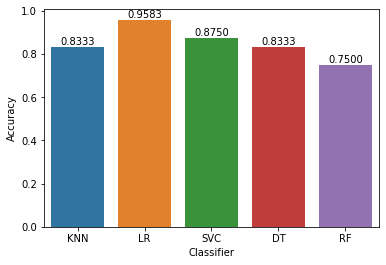

In [0]:
axis = sns.barplot(x = 'Name', y = 'Score', data =tr_split )
axis.set(xlabel='Classifier', ylabel='Accuracy')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.01, '{:1.4f}'.format(height), ha="center") 
    
plt.show()